# Apply Docker Compose To Deploy A Jupyter Environment For Processing Meteorological Data

We've demonstrated how to create a Jupyter notebook container for meteorological data processing in the [previous notebook](https://www.linkedin.com/pulse/create-jupyter-notebook-container-meteorological-data-chonghua-yin/), where we followed a hierarchy way and built our image based on the [data science stack](https://github.com/jupyter/docker-stacks/tree/master/datascience-notebook) image. In fact, [Project Jupyter](https://github.com/jupyter/docker-stacks/tree/master/datascience-notebook) maintains a GitHub repository containing numerous well-defined, well tested, fully functional and ready to use Jupyter Docker images with different tools already installed. This could save us a lot of time. All we need to do is tell Docker to start up a container based on that pre-defined image. This is the reason I love docker and use it for my work every day. 

A dependency tree taken from their documentation is shown below:

![Jupyter Docker Stacks](../img/jupyterdockestacks.png)

In this notebook, let's look at how we can use Docker Compose to rapidly deploy a Jupyter environment for processing meteorological/climatic data, even though using Docker Compose for our current project just looks like we are using a cannon to hit a mosquito.

![Haha](../img/cannon.png)

- [Docker Compose](https://docs.docker.com/compose/overview/)

>Compose is a tool for defining and running multi-container Docker applications. With Compose, you use a YAML file to configure your application’s services. Then, with a single command, you create and start all the services from your configuration. 

Before moving forward, make sure you have Docker and Docker Compose installed. Notes on installing Docker and Docker Compose can be found at [Docker](https://docs.docker.com/install/) and [Docker Compose](https://docs.docker.com/compose/overview/).

## 1. Define directory structure

Once Docker and Docker Compose are ready to go, let's define the file structure of our project. Start by creating a couple of directories in your current directory: ***data***, ***docker***, and ***notebooks***. Within the docker directory, create a file ***Dockerﬁle***, and then in your current directory, create a file ***docker-compose.yml***.

The working directory should have the following file structure:

├── data

├── docker-compose.yml

├── docker

│   └── Dockerﬁle

├── notebooks

## 2. Create Dockerfile

Just as we did [before](https://www.linkedin.com/pulse/create-jupyter-notebook-container-meteorological-data-chonghua-yin/), we will create our own Dockerfile on the [data science stack](https://github.com/jupyter/docker-stacks/tree/master/datascience-notebook) image. While the bulk of what's needed is provided by the base image, it's useful to define our own Dockerfile to include dependencies that may not be included in the base image. In this case, we're installing a handful of dependencies that are useful for meteorological data processing such as dask, xarray, cfgrib and metpy.

Add the following contents to ./jupyter/Dockerﬁle: 

FROM jupyter/datascience-notebook

MAINTAINER Chonghua Yin<royalosyin@gmail.com>

RUN conda install --quiet --yes -c conda-forge dask cfgrib metpy

WORKDIR /notebooks

VOLUME /notebooks 

In the above Dockerfile, we define the working directory at /notebook with the keyword of ***WORKDIR*** and use the ***VOLUME*** to tell Docker that the /notebooks directory would be stored on the host file system, not in the container file system. This implies that those really-working notebooks stored in the volume will persist and be available even if you stop the container and remove the container with *docker rm*.

## 3. Create docker-compose.yml

Now that we have our Dockerfile defined, let's add some content to ./docker-compose.yml that will help us get Jupyter kicked off. 

Add the following content to ./docker-compose.yml:

version: "3"

services:

  jupyter:
  
    build:
    
      context: ./docker
    
    ports:
      - "8888:8888" 
      
    volumes:
    
          - "./notebooks:/notebooks" 
          
          - "./data:/data"
          
This file defines only one service: jupyter. The jupyter service will be built from the Dockerfile defined above (/docker). We also mount two working directories created above, ./notebooks and ./data to the jupyter service at /notebooks and /data respectively.

For more information about the Compose file, see the [Compose file reference](https://docs.docker.com/compose/compose-file/).

## 4. Start docker-compose

If all the above went well, all that should be left to get things spinning is running the following in our working directory:

$ docker-compose up

This should result in the jupyter container being built, and then the jupyter service being started. You should see something like this in your console:

![Start Docker Compose](../img/startcompose.png)

The first time we access the Jupyter web interface, we need to use the link provided in the console, subsequently we can directly visit http:/ localhost:8888. Click the link in the console - a browser should open to the following view:

![Jupyter Notebook](../img/jupyternotebook.png)

From here, you can create a new notebook - the .ipynb file will live in the host machine's filesystem at ./notebooks. You can use the ./data directory to store any data that you might want to access from your notebook. In addition, to shut down the container once you’re done working, simply hit Ctrl-C in the terminal/command prompt. Your work will all be saved on your actual machine in the path we set in our Docker compose file. And there you have it — a quick and easy way to start using Jupyter notebooks with the magic of Docker.

## 5. Start Jupyter notebook show

Here we put the downloaded GFS GRIB file of gfs.t06z.pgrb2.0p25.f000 into the ***/data*** folder and We still use xarray with the cfgrib backend to open the file.

In [7]:
!ls /data

gfs.t06z.pgrb2.0p25.f000  gfs.t06z.pgrb2.0p25.f000.887f8.idx


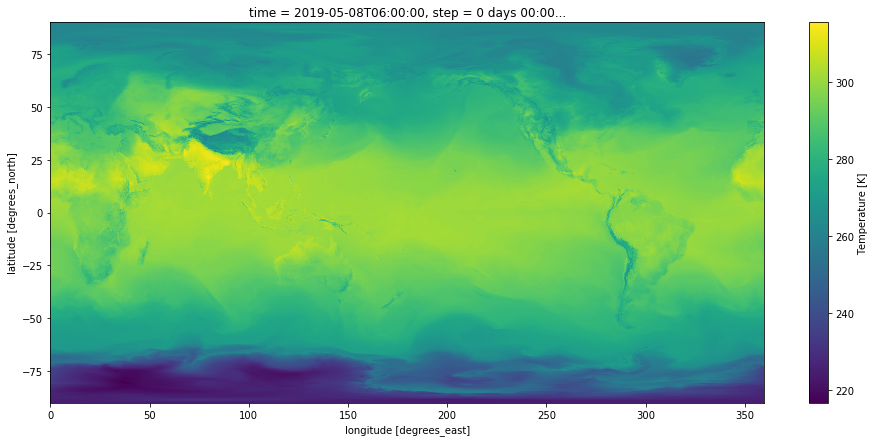

In [6]:
%matplotlib inline
import xarray as xr

ds = xr.open_dataset("/data/gfs.t06z.pgrb2.0p25.f000",  
                     engine="cfgrib", 
                     backend_kwargs={
                        'filter_by_keys': {'typeOfLevel': 'pressureFromGroundLayer'},
                        'errors': 'ignore'
                    })

temperature = ds['t']
temperature.plot(figsize=(16,7));

## Summary

Docker Compose is particularly useful for the data scientist in building standalone computational systems comprised of Jupyter and one or more data stores. Docker-compose could work in all environments: production, staging, development, testing, as well as CI workflows. 

Moreover, using Docker Compose just need simply follow a [three-step process](https://docs.docker.com/compose/overview/):

- Define your app’s environment with a Dockerfile so it can be reproduced anywhere.

- Define the services that make up your app in docker-compose.yml so they can be run together in an isolated environment.

- Run docker-compose up and Compose starts and runs your entire app.

In this notebook, we just gave a simple try. However, we still could find that it is really convenient to apply Docker Compose to rapidly deploy a Jupyter environment for processing meteorological/climatic data.